In [377]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import xgboost as xgb

In [378]:
data = fetch_california_housing()

In [382]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [380]:
X = data.data  # Feature data
y = data.target  

In [381]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [384]:
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()  # Adding XGBoost
}

In [385]:
# Store results for comparison
results = []

# Loop through each model, train, and evaluate performance
for model_name, model in models.items():
    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Record testing time
    start_time = time.time()
    y_pred = model.predict(X_test)
    testing_time = time.time() - start_time

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
   

    # Append results for the current model
    results.append({
        "Model": model_name,
        "Training Time (s)": training_time,
        "Testing Time (s)": testing_time,
        "Mean Squared Error": mse,
        
    })

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display the comparison results
print(results_df)


               Model  Training Time (s)  Testing Time (s)  Mean Squared Error
0  Linear Regression           0.010997          0.000996            0.555892
1                SVM          20.252687          8.794585            1.332012
2                KNN           0.030969          0.035006            1.118682
3      Decision Tree           0.670578          0.002996            0.493912
4      Random Forest          51.693175          0.148909            0.255637
5  Gradient Boosting          10.900292          0.013006            0.294079
6            XGBoost           1.175290          0.049970            0.222590


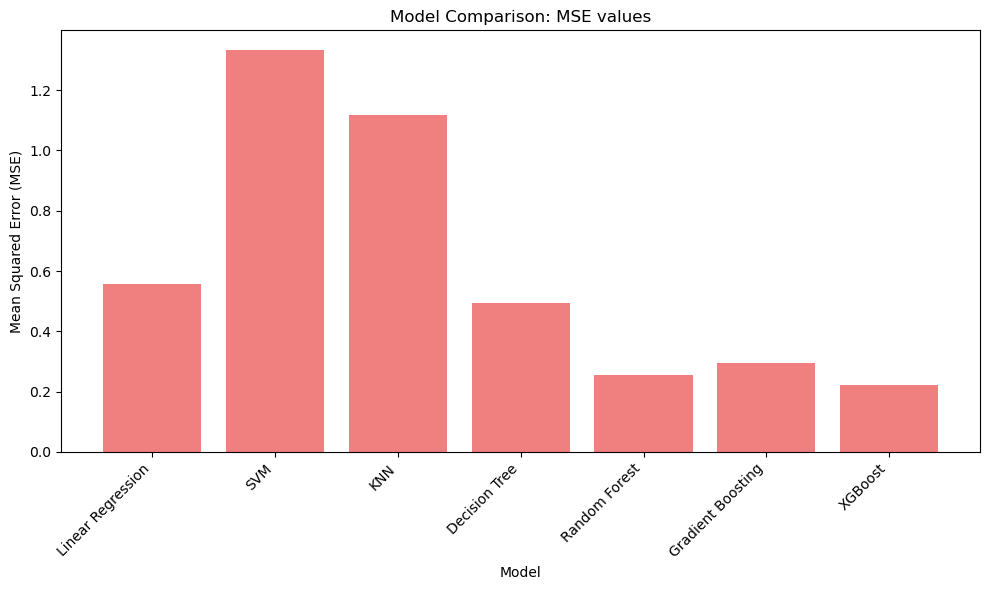

In [395]:
plt.figure(figsize=(10, 6))

# The 'height' argument should be the MSE values from the 'results_df'
plt.bar(results_df["Model"], results_df["Mean Squared Error"], color='lightcoral')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison: MSE values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()

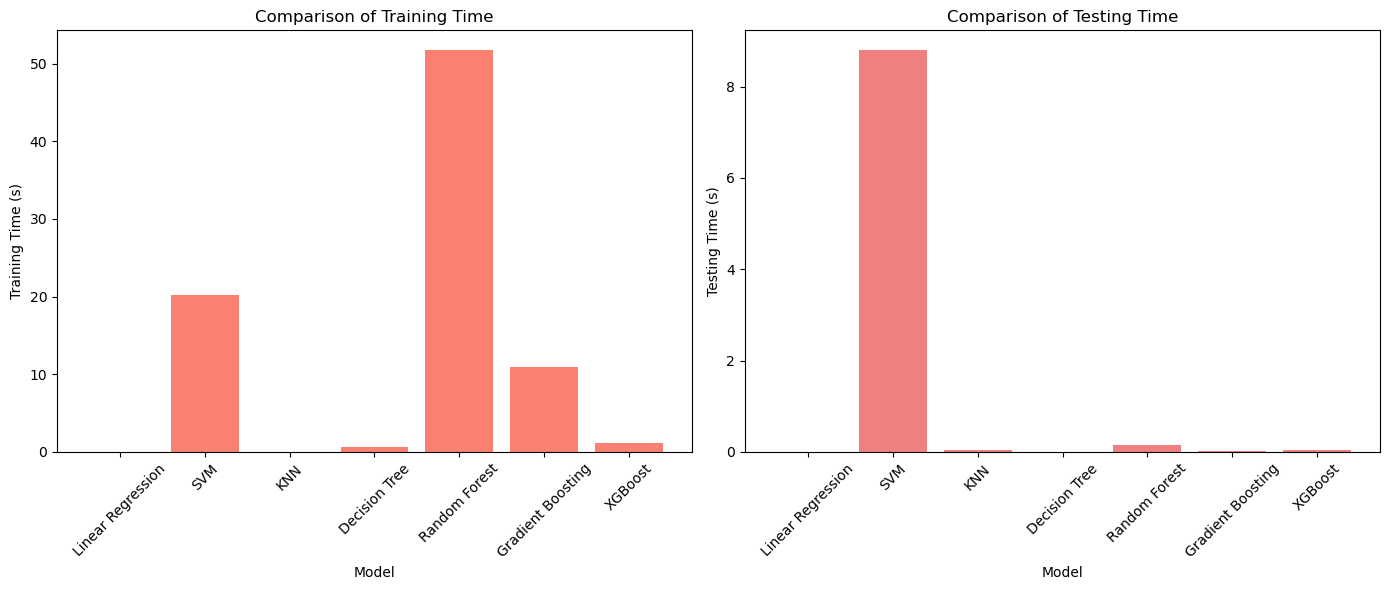

In [392]:
# 3. Plot Training and Testing Time for each model
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training Time
ax[0].bar(results_df["Model"], results_df["Training Time (s)"], color='salmon')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Training Time (s)')
ax[0].set_title('Comparison of Training Time')
ax[0].tick_params(axis='x', rotation=45)

# Testing Time
ax[1].bar(results_df["Model"], results_df["Testing Time (s)"], color='lightcoral')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Testing Time (s)')
ax[1].set_title('Comparison of Testing Time')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()